In [1]:
import math
from math import sqrt,e, log
from matplotlib import pyplot as plt
%matplotlib inline

In [8]:
def plot_res(res, num_it, results, target, n):
    print(f'our solution: {res} within {num_it} iterations\ntarget function: {target(n)}\ndifference between them: {res-target(n)}\n\n')
    print(results)
    plt.plot(results,'r+-', [target(n)]*(num_it+1),'g-')
    plt.title('Convergence')
    plt.xticks(range(num_it+1))
    plt.xlabel('Iterations')
    plt.ylabel('Value')
    plt.legend(['NR','Target'])

# Newton Raphson method: $x_1 = x_0-\frac{f(x_0)}{f'(x_0)}$

A method to look for solutions of an arbitrary function f(x)

_solution_ in our case means: find point 'x' such that that at that point f(x) = 0 

<img src="300px-NewtonIteration_Ani.gif" width=600/>

Lets look at an example **$\sqrt{n}$ (square root of n)** 

we want to solve $x = \sqrt{n}$ 

threfore we define our function $f(x) = x^2 - n$ 

Why? Because when $f(x) = 0$ 

we see that  $x^2 - n = 0$ or in other words $x^2 = n \Rightarrow x = \pm\sqrt{n}$

derivative of f(x) is $ f'(x) = (x^2)' = 2x$

therefore newton equation: $ x_1 = x_0 - \frac{f(x_0)}{f'(x_0)} = x_0 - \frac{{x_0}^2-n}{2x_0}$

or simplified: $ x_1 = x_0 - \frac{1}{2}(x_0-\frac{n}{x_0})$

let's try it out:


In [9]:
# let's try to calculate the square root of 2 !
n = 2
# I'm going to guess that it is 1 (something that feels realtively sensible? )
x0 = 1
# what's the true value of square root of 2 ? Let's call it "target"
target = sqrt(2)
print(f'our target value is square root of 2: {target}')
# first iteration:
x1 = x0 - 0.5 * (x0 - 2/x0)
print(f'iteration 1: {x1}, difference from target: {math.fabs(x1-target)}')


our target value is square root of 2: 1.4142135623730951
iteration 1: 1.5, difference from target: 0.08578643762690485


In [10]:
# second iteration:
x2 = x1 - 0.5 * (x1 - 2/x1)
print(f' iteration 2: {x2}, difference from target: {math.fabs(x2-target)}')

 iteration 2: 1.4166666666666665, difference from target: 0.002453104293571373


In [11]:
# third iteration:
x3 = x2 - 0.5 * (x2 - 2/x2)
print(f' iteration 3: {x3}, difference from target: {math.fabs(x3-target)}')

 iteration 3: 1.4142156862745097, difference from target: 2.123901414519125e-06


In [6]:
# third iteration:
x4 = x3 - 0.5 * (x3 - 2/x3)
print(f' iteration 4: {x4}, difference from target: {math.fabs(x4-target)}')

 iteration 4: 1.4142135623746899, difference from target: 1.5947243525715749e-12


our solution: 1.4142135623746899 within 4 iterations
target function: 1.4142135623730951
difference between them: 1.5947243525715749e-12


[1, 1.5, 1.4166666666666665, 1.4142156862745097, 1.4142135623746899]


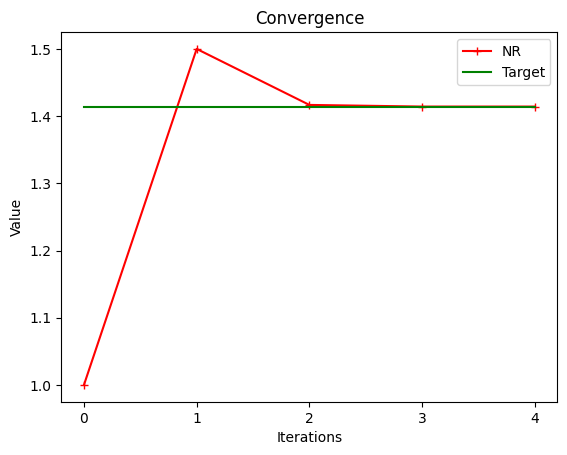

In [12]:
plot_res(x4,4,[x0,x1,x2,x3,x4], sqrt, n)

## We can use this method for any convenient function (especially if we can find its derivative)

let's make it into a function that codifies what we did in the steps above:

In [27]:
def newton_raphson(n, x0, f, max_it=20):
    results = [x0]
    iterations = 0
    while True:
        res = f(results[iterations], n)
        if math.fabs(results[iterations] - res) < 1e-10:
            return res, iterations, results
        iterations += 1
        results.append(res)
        if iterations > max_it:
            return results[-1], -1, results
            

## Let's try same thing with a fifth root !

Just like before, we define our function $f(x) = x^5 - n$ (because when our f(x)=0 we know that x equals the fifth root of n)

derivative of f(x) is $ f'(x) = 5x^4$

therefore newton equation: $ x_1 = x_0 - \frac{{x_0}^5-n}{5{x_0}^4}$

or simplified: $ x_1 = x_0 - \frac{1}{5}(x_0-\frac{n}{{x_0}^4})$

In [14]:
f2 = lambda x,n: x - 0.2*(x - n/(x**4)) 

In [23]:
# the number which we are putting under fifth root:
n = 379
# the initial guess - what we think is close to the result
x = 4

our solution: 3.27889751040364 within 5 iterations
target function: 3.2788975104036404
difference between them: -4.440892098500626e-16


[4, 3.49609375, 3.3042591842252533, 3.2792838580965924, 3.278897601427755, 3.2788975104036453]


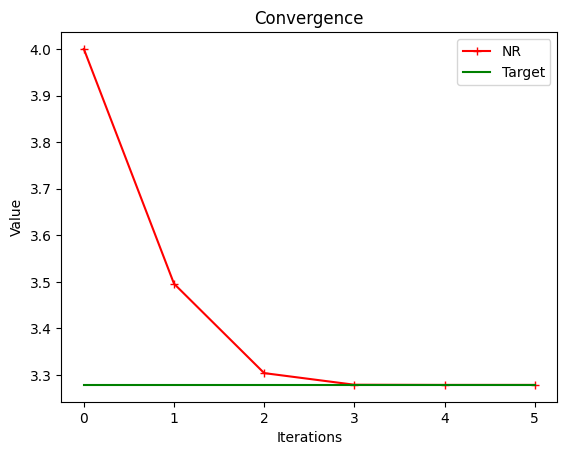

In [24]:
r, it, rr = newton_raphson(n,x,f2)
plot_res(r, it, rr, lambda x:x**0.2, n)

## The initial guess we give is meaningful in terms of the amount of iterations

This time let's guess that $x_0  =  \sqrt[5]{379} \approx 60$ (which is obviously wrong)

In [30]:
n = 379
x = 60

our solution: 3.27889751040364 within 17 iterations
target function: 3.2788975104036404
difference between them: -4.440892098500626e-16


[60, 48.00000584876543, 38.40001895821787, 30.720050027864048, 24.576125132475582, 19.66110789163809, 15.729393581069138, 12.58475315178148, 10.070824493176012, 8.064028603690115, 6.469147957368163, 5.218597729807864, 4.277078895894856, 3.6481693510348743, 3.346462042152016, 3.281571215716639, 3.278901863731666, 3.2788975104151996]


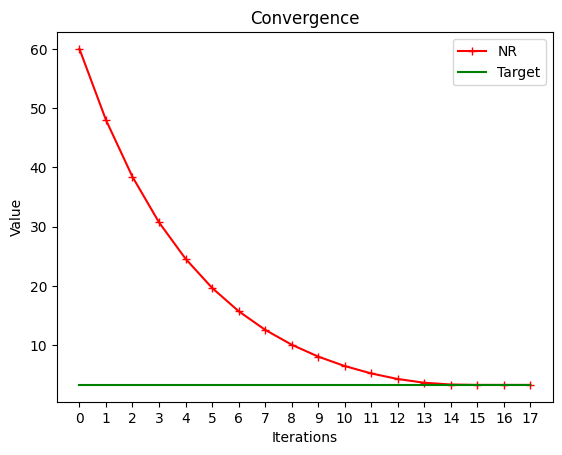

In [31]:
r, it, rr = newton_raphson(n,x,f2)
plot_res(r, it, rr, lambda x:x**0.2,n)

### ^--- IT TOOK THIRTEEN MORE ITERATIONS !!!

now, let's try a wildly wrong initial guess this time - let's assume $x_0 = -60$ (obviously impossible since the number under the root is positive, and the root index is odd)

to do this, let's unrestrict the newton_raphson to be able to do up to 200 iterations, just in case... 😉

our solution: 3.27889751040364 within 31 iterations
target function: 3.2788975104036404
difference between them: -4.440892098500626e-16


[-60, -47.99999415123457, -38.399981041768214, -30.71994997198713, -24.575874866296527, -19.6604920989156, -15.727886347817629, -12.581070316590134, -10.061830741500778, -8.042069201595556, -6.415533701097255, -5.0876826274237805, -3.9570131399232196, -2.8564391664585784, -1.1465562912854934, 42.94467904743777, 34.35576552393144, 27.484666828137822, 21.987866295913182, 17.590617329194057, 14.073285534620263, 11.260560784002356, 9.013163056518065, 7.22201621993611, 5.80547645666713, 4.7111106441615656, 3.9227663226481586, 3.4583232140199973, 3.2965743924752724, 3.279086070449849, 3.278897532088247, 3.2788975104036404]


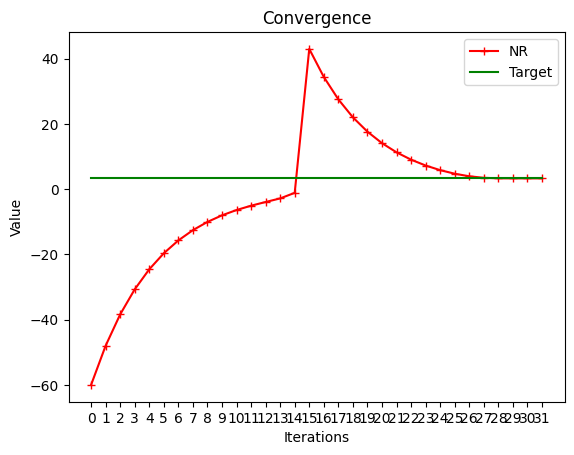

In [32]:
n = 379
x = -60
limit = 200
r, it, rr = newton_raphson(n,x,f2, limit)
plot_res(r, it, rr, lambda x:x**0.2,n)

### IT STILL SUCCEEDS ! (but after whooping 31 iterations !)

notice the big jump it took from negative to positive value to actually start proper convergence

# Let's look at a tougher function: $ln(n)$ (natural logarithm, aka $log_e(x)$)

same as before, let's figure out Newton's equation: $ln(n) = x$

means we want to look for a solution to $f(x) = n - e^x$

first derivative is: $f'(x) = -e^x$

Newton equation: $x_1 = x_0 - \frac{n - e^{x_0}}{-e^{x_0}}$

## simplified: $x_1 = x_0 - 1 + \frac{n}{e^{x_0}}$

In [20]:
f3 = lambda x,n: x - 1 + n/e**x

In [21]:
x = 5
n = 10

our solution: 2.302585092994046 within 7 iterations
target function: 2.302585092994046
difference between them: 0.0


[5, 4.067379469990855, 3.2386014600361466, 2.6307885169350502, 2.351005012459698, 2.303738644129041, 2.3025857580783953, 2.302585092994267]


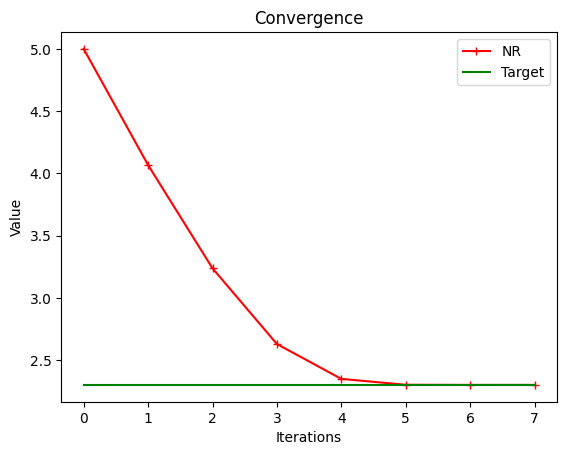

In [22]:
r, it, rr = newton_raphson(n,x,f3)
plot_res(r, it, rr, log, n)